In [1]:
import os

%matplotlib inline
%config InlineBackend.close_figures = False

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ficus import FigureManager

sns.set()

In [2]:
def process_done():
    done_sigs = pd.read_table("done_sigs", sep="\t", names=["Run", "size_KB", "seconds"])
    done_sigs["Run"] = done_sigs["Run"].str.replace(r".*/(?P<id>\w+).sig", lambda m: m.group("id"))
    done_sigs["size_MB"] = done_sigs["size_KB"] / 1024
    del done_sigs["size_KB"]
    done_sigs['seconds'] = pd.to_datetime(done_sigs['seconds'].astype(int) * (10**9))
    done_sigs = done_sigs.set_index("Run")

    return done_sigs


def process(metadata, done):
    missing = metadata.drop_duplicates(subset=["Run"]).set_index("Run").reindex(set(metadata["Run"]).difference(set(done.index)))
    missing = missing[missing["size_MB"] > 0]

    completed = metadata.drop_duplicates(subset=["Run"]).set_index("Run").reindex(set(done.index))
    completed = completed[completed["size_MB"] > 0]

    return metadata, missing, completed

def summary(metadata, missing, completed):
    all_desc = metadata[metadata["size_MB"] > 0].describe()
    all_desc.columns = ["all"]
    all_desc["missing"] = missing.describe()
    all_desc["completed"] = completed.describe()

    sum_df = pd.DataFrame([[metadata['size_MB'].sum(),
                            missing['size_MB'].sum(),
                            completed['size_MB'].sum()]],
                          columns=all_desc.columns,
                          index=["sum"])

    print(all_desc.append(sum_df).applymap(lambda x: "{:,.0f}".format(x)))

    print()
    print("max:")
    print(missing.loc[missing.idxmax()].applymap(lambda x: "{:,.0f}".format(x)))
    
def missing_info(metadata, missing):
    print(f"missing: {len(missing.query('size_MB > 10000'))}")
    print(missing.query('size_MB > 10000').sum())
    
    with FigureManager(figsize=(10, 8), show=True) as (fig, ax):
        sns.histplot(metadata["size_MB"], kde=False, ax=ax, bins=range(1, 20000, 100))    
        sns.histplot(missing["size_MB"], kde=False, ax=ax, bins=range(1, 20000, 100), color="red")
        ax.set_ylim(1, 200)
        #ax.set_yscale('log')
        #sns.swarmplot(data=missing, y="size_MB", color=".2", ax=ax)

## metagenomes (source)

In [3]:
metadata = pd.read_table("metagenomes_source-20200929.csv", sep=',', usecols=["Run", "size_MB"])

In [4]:
done_sigs = process_done()
metagenomes, missing, completed = process(metadata, done_sigs)

summary(metagenomes, missing, completed)

               all     missing    completed
count      528,976      35,213      493,763
mean           906         672          923
std          2,849       2,066        2,896
min              1           1            1
25%              7          13            7
50%             58         299           50
75%            673         840          626
max        170,085     121,276      170,085
sum    479,169,252  23,646,445  455,522,807

max:
             size_MB
Run                 
SRR10158848  121,276


In [5]:
done_sigs = process_done()
metagenomes, missing, completed = process(metadata, done_sigs)

summary(metagenomes, missing, completed)

               all     missing    completed
count      528,976      35,213      493,763
mean           906         672          923
std          2,849       2,066        2,896
min              1           1            1
25%              7          13            7
50%             58         299           50
75%            673         840          626
max        170,085     121,276      170,085
sum    479,169,252  23,646,445  455,522,807

max:
             size_MB
Run                 
SRR10158848  121,276


missing: 139
size_MB    3241683
dtype: int64


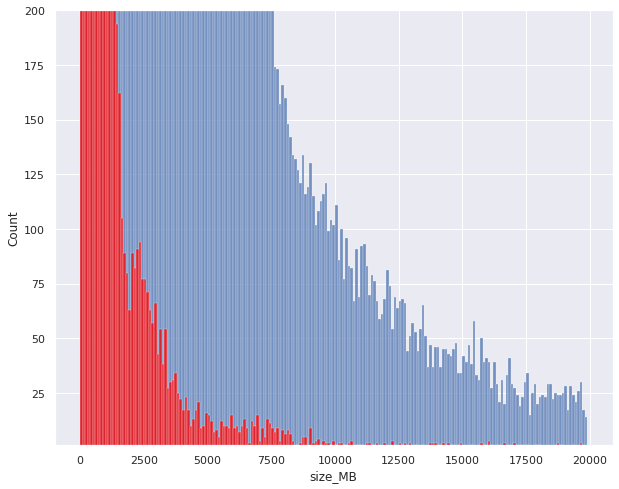

In [6]:
missing_info(metagenomes, missing)

/home/luizirber/miniconda3/envs/thesis/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


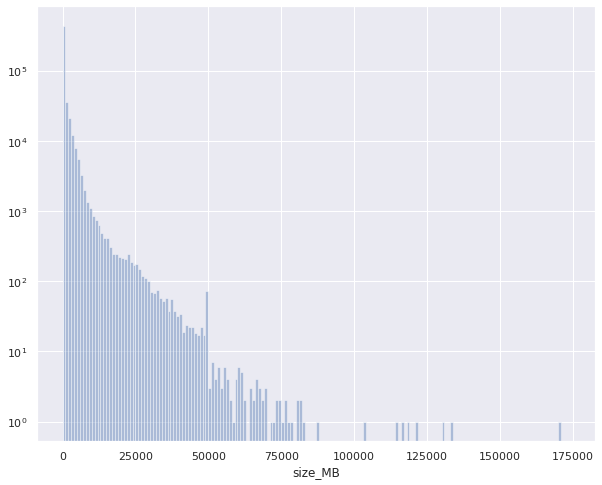

In [7]:
with FigureManager(figsize=(10, 8), show=True) as (fig, ax):
    sns.distplot(metagenomes["size_MB"], kde=False, ax=ax, bins=range(1, 175000, 1000))
    ax.set_yscale('log')
    #sns.swarmplot(data=missing, y="size_MB", color=".2", ax=ax)

## Microbial

In [8]:
metadata = pd.read_table("microbial_new_20200603.csv", sep=',', usecols=["Run", "size_MB"])

done_sigs = process_done()
microbial, missing, completed = process(metadata, done_sigs)

summary(microbial, missing, completed)

               all     missing    completed
count    1,193,427       1,737    1,191,690
mean           295       8,059          284
std            750       6,601          642
min              1           2            1
25%            117       4,310          117
50%            192       6,799          192
75%            288      10,075          287
max         93,265      93,265       72,445
sum    352,552,304  13,998,374  338,553,930

max:
           size_MB
Run               
SRR7412678  93,265


In [9]:
done_sigs = process_done()
microbial, missing, completed = process(metadata, done_sigs)

summary(microbial, missing, completed)

               all     missing    completed
count    1,193,427       1,737    1,191,690
mean           295       8,059          284
std            750       6,601          642
min              1           2            1
25%            117       4,310          117
50%            192       6,799          192
75%            288      10,075          287
max         93,265      93,265       72,445
sum    352,552,304  13,998,374  338,553,930

max:
           size_MB
Run               
SRR7412678  93,265


missing: 445
size_MB    6841250
dtype: int64


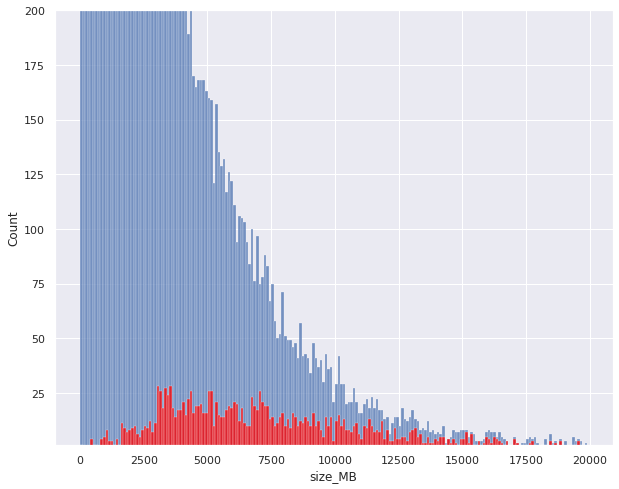

In [10]:
missing_info(microbial, missing)

## Not plants or animals

In [11]:
metadata = pd.read_table("no_plants_animals_20201014.csv", sep=',', usecols=["Run", "size_MB"])

done_sigs = process_done()
not_plants_animals, missing, completed = process(metadata, done_sigs)

summary(not_plants_animals, missing, completed)

               all      missing    completed
count    1,770,502       62,789    1,707,713
mean           385        1,939          328
std          1,337        4,536        1,002
min              1            1            1
25%             86          146           85
50%            179          285          177
75%            304        1,853          298
max        209,497      209,497       82,418
sum    681,848,751  121,734,567  560,114,184

max:
           size_MB
Run               
SRR066134  209,497


In [12]:
done_sigs = process_done()
not_plants_animals, missing, completed = process(metadata, done_sigs)

summary(not_plants_animals, missing, completed)

               all      missing    completed
count    1,770,502       62,789    1,707,713
mean           385        1,939          328
std          1,337        4,536        1,002
min              1            1            1
25%             86          146           85
50%            179          285          177
75%            304        1,853          298
max        209,497      209,497       82,418
sum    681,848,751  121,734,567  560,114,184

max:
           size_MB
Run               
SRR066134  209,497


missing: 2375
size_MB    44043790
dtype: int64


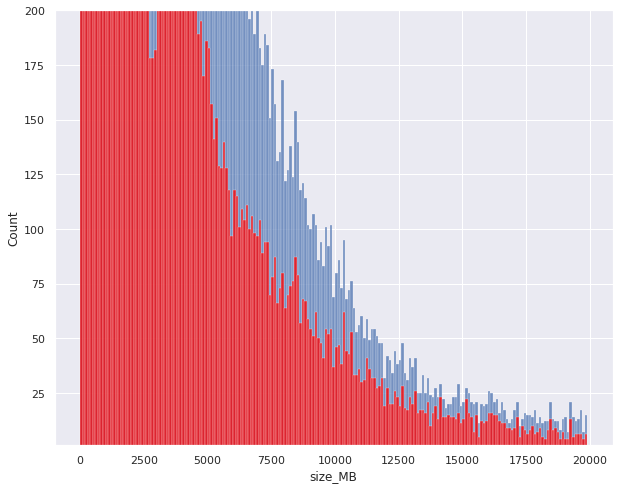

In [13]:
missing_info(not_plants_animals, missing)

/home/luizirber/miniconda3/envs/thesis/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


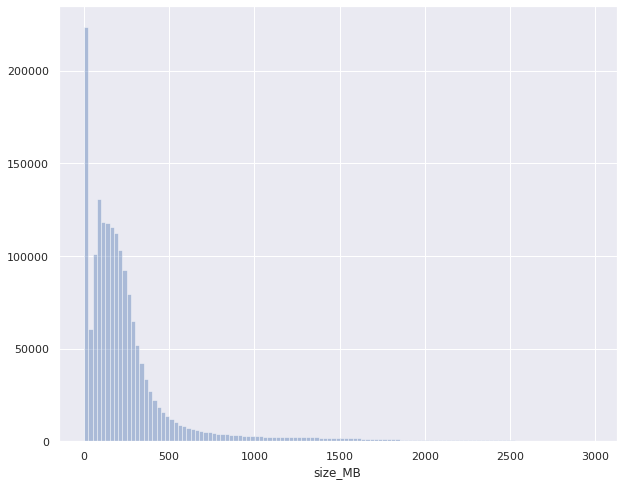

In [14]:
with FigureManager(figsize=(10, 8), show=True) as (fig, ax):
    sns.distplot(not_plants_animals["size_MB"], kde=False, ax=ax, bins=range(1, 3000, 25))
    #sns.swarmplot(data=missing, y="size_MB", color=".2", ax=ax)

## RefSeq

In [26]:
metadata = pd.read_table("assembly_summary_refseq.txt",
                         usecols=["# assembly_accession"],#, "size_MB"],
                         skiprows=1
                        )

In [27]:
metadata

,# assembly_accession
0,GCF_000001215.4
1,GCF_000001405.39
2,GCF_000001635.26
3,GCF_000001735.4
4,GCF_000001895.5
...,...
204946,GCF_903645325.1
204947,GCF_903645345.1
204948,GCF_903645355.1
204949,GCF_903652925.1


In [21]:
!head assembly_summary_refseq.txt

#   See ftp://ftp.ncbi.nlm.nih.gov/genomes/README_assembly_summary.txt for a description of the columns in this file.
# assembly_accession	bioproject	biosample	wgs_master	refseq_category	taxid	species_taxid	organism_name	infraspecific_name	isolate	version_status	assembly_level	release_type	genome_rep	seq_rel_date	asm_name	submitter	gbrs_paired_asm	paired_asm_comp	ftp_path	excluded_from_refseq	relation_to_type_material
GCF_000001215.4	PRJNA164	SAMN02803731		reference genome	7227	7227	Drosophila melanogaster			latest	Chromosome	Major	Full	2014/08/01	Release 6 plus ISO1 MT	The FlyBase Consortium/Berkeley Drosophila Genome Project/Celera Genomics	GCA_000001215.4	identical	ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/215/GCF_000001215.4_Release_6_plus_ISO1_MT		
GCF_000001405.39	PRJNA168			reference genome	9606	9606	Homo sapiens			latest	Chromosome	Patch	Full	2019/02/28	GRCh38.p13	Genome Reference Consortium	GCA_000001405.28	different	ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/

In [17]:
done_sigs = process_done()
refseq, missing, completed = process(metadata, done_sigs)

summary(refseq, missing, completed)

ValueError: Passed header names mismatches usecols

In [18]:
missing_info(refseq, missing)

NameError: name 'refseq' is not defined

## Metagenome sizes

In [ ]:
import scipy
from scipy.stats import pareto
import numpy as np

In [ ]:
counts, bins = np.histogram(metagenomes["size_MB"], bins=range(1, 175000, 10))

In [ ]:
# reminder: http://bactra.org/weblog/491.html
b, loc, scale = pareto.fit(metagenomes["size_MB"])
b, loc, scale

In [ ]:
rv = pareto(b)

In [ ]:
#mean, var, skew, kurt
pareto.stats(b, moments='mvsk')

In [ ]:
norm_counts = counts / np.linalg.norm(counts, ord=1)

In [ ]:
with FigureManager(figsize=(10, 5), show=True) as (fig, ax):
    plt.loglog(bins[:-1], norm_counts, 'x')
    x = np.linspace(pareto.ppf(0.01, b),
                    pareto.ppf(0.99, b), 100)
    plt.loglog(bins[:-1], rv.pdf(bins[:-1]), 'r-', lw=5, alpha=0.6, label='pareto pdf')
    #plt.loglog(bins[:-1], powlaw(bins[:-1], *popt), 'o')
    #plt.loglog(bins[:-1], powlaw(bins[:-1], popt[0], -.9999999), '--')

In [ ]:
with FigureManager(figsize=(10, 5), show=True, filename="../../thesis/figure/wortMetagSizes.png") as (fig, ax):
    ar = sorted(metagenomes["size_MB"])#, reverse=True)
    y = np.cumsum(ar).astype("float32")  
    y = np.hstack((0,y))
    x = np.linspace(0, 100, y.size)
    plt.plot(x,y)
    plt.title("Cumulative sum of dataset sizes")
    plt.ylabel("cumulative size (MB)")
    plt.xlabel("percentage of total datasets (sorted by size)")

## Completion over time

In [ ]:
with FigureManager(figsize=(10, 8), show=True) as (fig, ax):
    sns.histplot(done_sigs['seconds'], kde=False, ax=ax, bins=770)
    #ax.set_ylim(1, 500)
    ax.set_yscale('log')
    #sns.swarmplot(data=missing, y="size_MB", color=".2", ax=ax)

In [ ]:
with FigureManager(figsize=(10, 5), show=True) as (fig, ax):
    ar = sorted(done_sigs["seconds"])#, reverse=True)
    y = np.cumsum(ar).astype("float32")
    y = np.hstack((0,y))
    x = np.linspace(0, 100, y.size)
    plt.plot(x,y)
    plt.title("Cumulative sum of dataset sizes")
    plt.ylabel("cumulative size (MB)")
    plt.xlabel("percentage of total datasets (sorted by size)")

In [ ]:
done_sigs_metagenomes = metagenomes.drop_duplicates(subset=["Run"]).set_index("Run").reindex(set(metagenomes["Run"]).intersection(set(done_sigs.index)))

In [ ]:
done_sigs.reindex(done_sigs_metagenomes.index).sum()